# To predict whether someone is likely to stop using a telco company services (Customer Churn)

Using IBM Churn dataset

In [ ]:
%pip install -qU\
    pandas\
    xgboost\
    scikit-learn == 1.3.1\
    graphviz==0.20.3

## Import the Data

In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df=pd.read_csv('Telco_customer_churn.csv')

In [19]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


Data Description
7043 observations with 33 variables

CustomerID: A unique ID that identifies each customer.

Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

Country: The country of the customer’s primary residence.

State: The state of the customer’s primary residence.

City: The city of the customer’s primary residence.

Zip Code: The zip code of the customer’s primary residence.

Lat Long: The combined latitude and longitude of the customer’s primary residence.

Latitude: The latitude of the customer’s primary residence.

Longitude: The longitude of the customer’s primary residence.

Gender: The customer’s gender: Male, Female

Senior Citizen: Indicates if the customer is 65 or older: Yes, No

Partner: Indicate if the customer has a partner: Yes, No

Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

In [3]:
df.drop(['Churn Label','Churn Score','CLTV','Churn Reason'],
axis=1,inplace=True)
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


The last four variables contain exit interview information and should not be used for prediction.

In [21]:
df['Count'].unique()

array([1], dtype=int64)

In [22]:
df['Country'].unique()

array(['United States'], dtype=object)

In [23]:
df['State'].unique()

array(['California'], dtype=object)

Single value variables are not useful for prediction and should be removed

Also variable of Customer ID should be removed because it is unique for every individual customer and does not contribute towards classfication in any way.

Lat Long variable will be removed because it is redundant as separate columns for Latitude and Longitude already exist

In [4]:
df.drop(['CustomerID','Count','Country','State','Lat Long'],
axis=1,inplace=True)
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


Removing the white spaces in city names so that we can draw a tree later.

In [5]:
df['City'].replace(' ','_',regex=True,inplace=True)
df.head()

C:\Users\Sabiha\AppData\Local\Temp\ipykernel_6128\1721609938.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['City'].replace(' ','_',regex=True,inplace=True)


,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


Eliminating white spaces from column names

In [6]:
df.columns=df.columns.str.replace(' ','_')
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


## Missing Data Part-1 : Identifying missing data

XGBoos has a default behaviour for missing data, so all we have to do is identify missing values and make sure they are set to 0

In [27]:
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Value            int64
dtype: object

A lot of the variables are of type 'object'. Let's make sure that they contain what is expected.

In [28]:
df['Phone_Service'].unique()

array(['Yes', 'No'], dtype=object)

Ideally check for every variable

In [29]:
df['Total_Charges'].unique()

array(['108.15', '151.65', '820.5', ..., '7362.9', '346.45', '6844.5'],
      dtype=object)

Too many to list but mainly numerical

In [30]:
df['Total_Charges']=pd.to_numeric(df['Total_Charges'])

ValueError: Unable to parse string " " at position 2234

So there exists blank spaces in Total_Charges (missing values)

## Missing Data Part-2 : Dealing with missing data

In [7]:
len(df.loc[df['Total_Charges']==' '])

11

In [8]:
df.loc[df['Total_Charges']==' ']

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


Since it is a small number, it can be dealt with by setting them to 0. (otherwise it would have been problematic)

We see that the 11 people with Total_Charges=' ' have just signed up because Tenure_Months is 0. Their churn value is also 0. 

In [9]:
df.loc[(df['Total_Charges']==' '),'Total_Charges']=0

In [10]:
df.loc[df['Tenure_Months']==0]

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,0


Cross checking through Tenure_Months

In [11]:
df['Total_Charges']=pd.to_numeric(df['Total_Charges'])

In [12]:
df['Total_Charges'].dtype

dtype('float64')

Now replacing white spaces with underscore throughout the dataset, this is done only to have a clean graph afterwards.

In [13]:
df.replace(' ','_',regex=True,inplace=True)
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30,1


## Format Data Part-1 : Split data into Dependent and independent variables

In [14]:
X=df.drop('Churn_Value',axis=1).copy()
X.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30


In [15]:
y=df['Churn_Value'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn_Value, dtype: int64

## Format Data Part-2 : One-Hot Encoding

Let's take a closer look at the variables in X

City-Category

Zip Code-Category

Latitude-Float

Longitude-Float

Gender-Category

Senior Citizen-Category

Partner-Category

Dependents-Category

Phone Service-Category

Tenure Months-Float

Multiple Lines-Category

Internet Service-Category

Online Security-Category

Online Backup-Category

Device Protection-Category

Tech Support-Category

Streaming TV-Category

Streaming Movies-Category

Contract-Category

Paperless Biling-Category

Payment Method-Category

Monthly Charges-Float

Total Charges-Float

Let's convert categorical data to continuous data using one hot encoding

In [16]:
X_encoded=pd.get_dummies(X,columns=['City',
                                    'Gender',
                                    'Senior_Citizen',
                                    'Partner',
                                    'Dependents',
                                    'Phone_Service',
                                    'Multiple_Lines',
                                    'Internet_Service',
                                    'Online_Security',
                                    'Online_Backup',
                                    'Device_Protection',
                                    'Tech_Support',
                                    'Streaming_TV',
                                    'Streaming_Movies',
                                    'Contract',
                                    'Paperless_Billing',
                                    'Payment_Method'],dtype='float64')
X_encoded.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,90003,33.964131,-118.272783,2,53.85,108.15,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,90005,34.059281,-118.307420,2,70.70,151.65,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,90006,34.048013,-118.293953,8,99.65,820.50,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,90010,34.062125,-118.315709,28,104.80,3046.05,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,90015,34.039224,-118.266293,49,103.70,5036.30,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [17]:
X['Total_Charges'].dtype

dtype('float64')

In [18]:
X_encoded.dtypes

Zip_Code                                      int64
Latitude                                    float64
Longitude                                   float64
Tenure_Months                                 int64
Monthly_Charges                             float64
                                             ...   
Paperless_Billing_Yes                       float64
Payment_Method_Bank_transfer_(automatic)    float64
Payment_Method_Credit_card_(automatic)      float64
Payment_Method_Electronic_check             float64
Payment_Method_Mailed_check                 float64
Length: 1178, dtype: object

In [67]:
y.unique()

array([1, 0], dtype=int64)

## Build a Preliminary XGBoost Model

At last, the data is correctly formatted for XGBoost model. Now before spliting the data into training and testing sets, let's check if the data is imbalanced by dividing the number of people who left the company, where y=1, by the total no. of people in the dataset.

In [68]:
sum(y)/len(y)

0.2653698707936959

Only 27% of the people left the company. Because of this we will split the dataset using stratification in order to maintain the same percentage of people who left the company in both the training and testing set. 

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,random_state=42,stratify=y)

In [24]:
sum(y_train)/len(y_train)

0.2654297614539947

In [25]:
sum(y_test)/len(y_test)

0.26519023282226006

We are using Early stopping to stop building trees when they no longer improve the situation.

In [18]:
clf_xgb=xgb.XGBClassifier(objective='binary:logistic',seed=42,early_stopping_rounds=10,eval_metric='aucpr')
clf_xgb.fit(X_train,
            y_train,
            eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.64135
[1]	validation_0-aucpr:0.65171
[2]	validation_0-aucpr:0.65991
[3]	validation_0-aucpr:0.65350
[4]	validation_0-aucpr:0.65743
[5]	validation_0-aucpr:0.65051
[6]	validation_0-aucpr:0.65827
[7]	validation_0-aucpr:0.65980
[8]	validation_0-aucpr:0.65751
[9]	validation_0-aucpr:0.65389
[10]	validation_0-aucpr:0.65572
[11]	validation_0-aucpr:0.65920
[12]	validation_0-aucpr:0.66010
[13]	validation_0-aucpr:0.65963
[14]	validation_0-aucpr:0.65877
[15]	validation_0-aucpr:0.65791
[16]	validation_0-aucpr:0.65808
[17]	validation_0-aucpr:0.65742
[18]	validation_0-aucpr:0.65770
[19]	validation_0-aucpr:0.65698
[20]	validation_0-aucpr:0.65733
[21]	validation_0-aucpr:0.65646


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

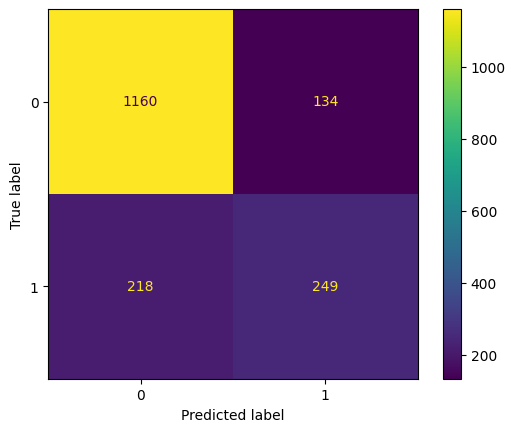

In [19]:
ConfusionMatrixDisplay.from_estimator(
    clf_xgb, X_test, y_test)

Out of the 1294 people that did not leave, 1160 (90%) were correctly classified. And of the 467 people that left the company, 249 (53%) were correctly classified. Therefore the predicitons are not great, because people leaving costs the company a lot of money, we would like to capture more of the people that left. Part of the problem is the imbalanced data. XGBoost has a parameter, scale_pos_weight, that helps with imbalanced data.

Let's try to improve the predictions by optimizing the paramters

## Optimize Parameters using RandomSearchCV

Random search cross-validation (RandomizedSearchCV) is a powerful technique for optimizing the hyperparameters of a machine learning model. It works in a similar way to grid search cross-validation, but instead of searching over a predefined grid of hyperparameters, it samples them randomly from a distribution.

When data are imbalanced, the XGBoost manual recommends balancing the positive and negative weights via scale_pos_weight and using AUC for evaluation if we care only about the overall performance metric of our prediction.

In [38]:
param_grid1={
    'max_depth':[3,4,5],
    'learning_rate':[0.1,.01,0.05],
    'gamma':[0,0.25,1.0],
    'reg_lambda':[0,1.0,10.0],
    'scale_pos_weight':[1,3,5]
}

To speed up the cross validation and to further prevent overfitting, we are using a random subset of the data (90%) and are using a random subset of the features (50%) per tree.

In [46]:

clf_xgb=xgb.XGBClassifier(objective='binary:logistic',
                                seed=42,
                                eval_metric='auc',
                                subsample=0.9,
                                colsample_bytree=0.5
                                )
optimum = RandomizedSearchCV(clf_xgb, param_grid1,random_state=42,scoring='roc_auc')
search = optimum.fit(X_train, y_train)
search.best_params_


{'scale_pos_weight': 5,
 'reg_lambda': 10.0,
 'max_depth': 4,
 'learning_rate': 0.05,
 'gamma': 0.25}

Because learning_rate, reg_lambda, and scale_pos_weight were at the ends of their range, we will continue to explore.

In [47]:
param_grid2={
    'max_depth':[4],
    'learning_rate':[0.05,0.025,.001],
    'gamma':[0.25],
    'reg_lambda':[10.0,15,20],
    'scale_pos_weight':[5,7,9]
}

In [51]:

clf_xgb=xgb.XGBClassifier(objective='binary:logistic',
                                seed=42,
                                eval_metric='auc',
                                subsample=0.9,
                                colsample_bytree=0.5
                                )
optimum = RandomizedSearchCV(clf_xgb, param_grid2,random_state=42,scoring='roc_auc')
search = optimum.fit(X_train, y_train)
search.best_params_


{'scale_pos_weight': 5,
 'reg_lambda': 10.0,
 'max_depth': 4,
 'learning_rate': 0.05,
 'gamma': 0.25}

## Building, evaluating and drawing the optimized XGBoost model

In [20]:
clf_final=xgb.XGBClassifier(objective='binary:logistic',
                                seed=42,
                                early_stopping_rounds=10,
                                eval_metric='auc',
                                subsample=0.9,
                                colsample_bytree=0.5,
                                max_depth=4,
                                learning_rate=0.05,
                                gamma=0.25,
                                reg_lambda=10.0,
                                scale_pos_weight=5)

In [21]:
clf_final.fit(X_train,
            y_train,
            eval_set=[(X_test,y_test)])

[0]	validation_0-auc:0.81068
[1]	validation_0-auc:0.83042
[2]	validation_0-auc:0.84521
[3]	validation_0-auc:0.85154
[4]	validation_0-auc:0.85366
[5]	validation_0-auc:0.85376
[6]	validation_0-auc:0.85461
[7]	validation_0-auc:0.85530
[8]	validation_0-auc:0.85552
[9]	validation_0-auc:0.85604
[10]	validation_0-auc:0.85589
[11]	validation_0-auc:0.85623
[12]	validation_0-auc:0.85586
[13]	validation_0-auc:0.85602
[14]	validation_0-auc:0.85729
[15]	validation_0-auc:0.85726
[16]	validation_0-auc:0.85763
[17]	validation_0-auc:0.85742
[18]	validation_0-auc:0.85749
[19]	validation_0-auc:0.85735
[20]	validation_0-auc:0.85729
[21]	validation_0-auc:0.85767
[22]	validation_0-auc:0.85812
[23]	validation_0-auc:0.85832
[24]	validation_0-auc:0.85831
[25]	validation_0-auc:0.85826
[26]	validation_0-auc:0.85797
[27]	validation_0-auc:0.85778
[28]	validation_0-auc:0.85829
[29]	validation_0-auc:0.85874
[30]	validation_0-auc:0.85871
[31]	validation_0-auc:0.85847
[32]	validation_0-auc:0.85858
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

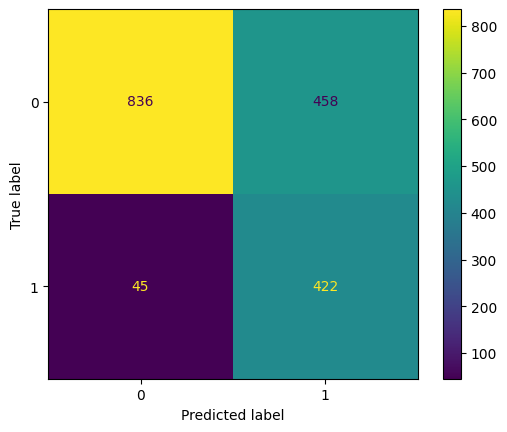

In [22]:
ConfusionMatrixDisplay.from_estimator(
    clf_final, X_test, y_test)

The optimized model does a lot better job at identifying people that left the company.Out of the 467 people that left the company, 422 (90%) were correctly classified.However this improvement was at the expense of not being able to correctly classify as many people that did not leave. Now of the 1294 people that did not leave, 836 (65%) were correctly classified. That said, this trade off maybe better for the company because now it can focus resources on the people that leave if that will help retain them. 

Let's draw the first XGBoost tree

Building the first tree gives us the cover, gain etc, at each node. If not the first tree, we will get the average over all the trees.

In [26]:
clf_xgb=xgb.XGBClassifier(objective='binary:logistic',
                                seed=42,
                                eval_metric='auc',
                                subsample=0.9,
                                colsample_bytree=0.5,
                                max_depth=4,
                                learning_rate=0.05,
                                gamma=0.25,
                                reg_lambda=10.0,
                                scale_pos_weight=5,
                                n_estimators=1)     #no. of trees = 1

In [27]:
clf_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

weight=number of times a feature is used in a branch or root across all trees

gain=the average gain across all splits that the feature is used in

cover=the average coverage across all splits that the feature is used in

total_gain=the total gain across all splits that the feature is used in

total_cover=the total coverage across all splits that the feature is used in

Since we built only one tree, gain=total_gain and cover=total_cover

In [29]:
bst=clf_xgb.get_booster()
for importance_type in ('weight','gain','cover','total_gain','total_cover'):
    print('%s: '%importance_type,bst.get_score(importance_type=importance_type))

node_params={'shape':'box',
             'style':'filled,rounded',
             'fillcolor':'#78cbe'}

leaf_params={'shape':'box',
             'style':'filled',
             'fillcolor':'#e48038'}

weight:  {'Latitude': 1.0, 'Monthly_Charges': 3.0, 'City_Cardiff_By_The_Sea': 1.0, 'Phone_Service_No': 1.0, 'Internet_Service_Fiber_optic': 1.0, 'Online_Security_No': 3.0, 'Online_Backup_No': 1.0, 'Tech_Support_Yes': 1.0, 'Contract_Month-to-month': 1.0, 'Contract_One_year': 1.0, 'Payment_Method_Electronic_check': 1.0}
gain:  {'Latitude': 24.692068099975586, 'Monthly_Charges': 96.4286117553711, 'City_Cardiff_By_The_Sea': 14.15576171875, 'Phone_Service_No': 11.563724517822266, 'Internet_Service_Fiber_optic': 273.08514404296875, 'Online_Security_No': 59.815433502197266, 'Online_Backup_No': 15.709476470947266, 'Tech_Support_Yes': 12.835662841796875, 'Contract_Month-to-month': 2240.31103515625, 'Contract_One_year': 66.44222259521484, 'Payment_Method_Electronic_check': 12.8450927734375}
cover:  {'Latitude': 120.51689910888672, 'Monthly_Charges': 341.0420837402344, 'City_Cardiff_By_The_Sea': 318.2291564941406, 'Phone_Service_No': 250.02072143554688, 'Internet_Service_Fiber_optic': 1629.167236

num_trees is NOT the number of trees to plot, but the specific tree we want to plot (here the 0th tree in n_estimators). The default value is 0.

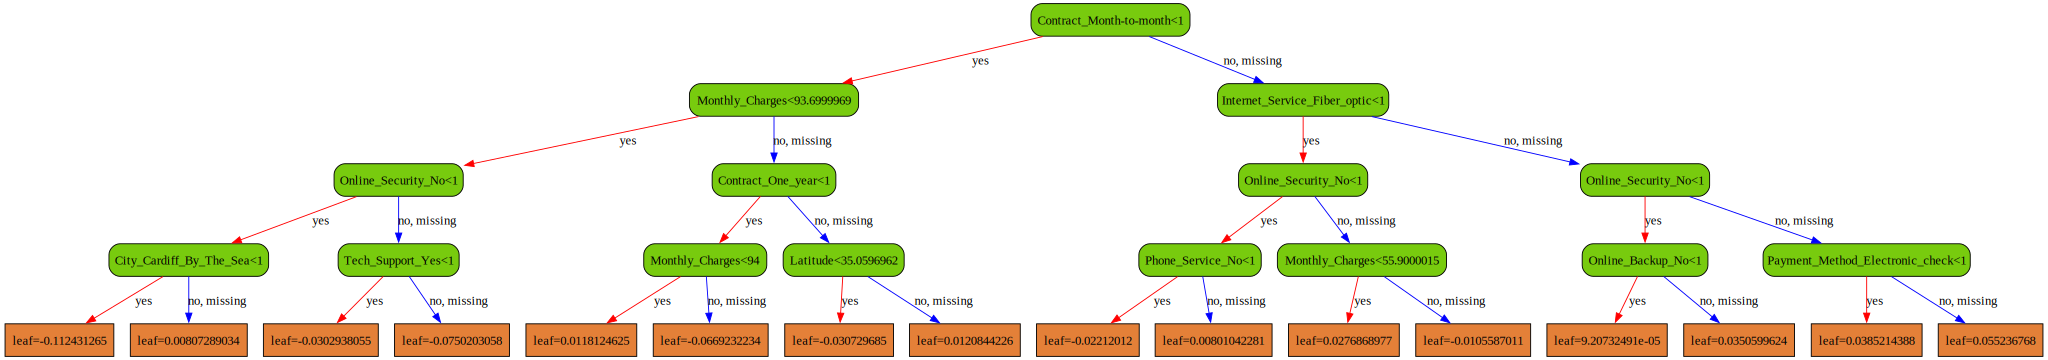

In [35]:
import os
os.environ["PATH"] += os.pathsep + 'c:\\Users\\Sabiha\\Downloads\\Compressed\\windows_10_cmake_Release_Graphviz-12.2.1-win64\\Graphviz-12.2.1-win64\\bin'
xgb.to_graphviz(clf_xgb,num_trees=0,size="10,10",
                condition_node_params=node_params,
                leaf_node_params=leaf_params)

In [ ]:
#to save the figure
graph_data=xgb.to_graphviz(clf_xgb,num_trees=0,size="10,10",
                condition_node_params=node_params,
                leaf_node_params=leaf_params)
graph_data.view(filename='xgboost_tree_customer_churn') #saves as pdf